# Compile all image data into a single dictionary file

This notebook opens images of neutron data
which describe void fraction of refrigerant
flowing through a microfluidic channel. The
data from each image is compiled into a single
dictinoary and saved to file so it can be
quickly opened by other notebooks.

Created on Thu Feb 13 10:33:13 2020  
author: ericmuckley@gmail.com

Full repository can be viewed at  
https://github.com/ericmuckley/fluid_channel_modeling

In [1]:
import os
import cv2
import numpy as np
from glob import glob
from time import time
import matplotlib.pyplot as plt

# change matplotlib settings to make plots look nicer
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.minor.width'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.minor.width'] = 3
plt.rcParams['ytick.major.width'] = 3

def plot_setup(labels=['X', 'Y'], fsize=18, title='', size=None):
    """Creates a custom plot configuration to make graphs look nice.
    This should be called between plt.plot() and plt.show() commands."""
    plt.xlabel(str(labels[0]), fontsize=fsize)
    plt.ylabel(str(labels[1]), fontsize=fsize)
    plt.title(title, fontsize=fsize)

def plot_channel_image(image, title=None, vmin=None, vmax=None):
    """Plot image of the channel, colored by void fraction."""
    plt.imshow(image, origin='lower', cmap='jet', vmin=vmin, vmax=vmax, )
    fig = plt.gcf()
    fig.set_size_inches(11,11)
    plt.axis('off')
    if title is not None:
        plt.title(title, fontsize=16)
    plt.show()

## Get image list

Get list of all images which we will model.

In [2]:
# navigate to data folder
data_dir = os.path.join(os.getcwd(), 'data')
print('Looking for files in: {}'.format(data_dir))

# get list of all '.tif' files in data folder
all_images = [f for f in glob(data_dir+'/*') if '.tif' in f]
print('Found {} images:'.format(len(all_images)))
for img in all_images:
    print(os.path.split(img)[1])

Looking for files in: C:\Users\Eric\Documents\GitHub\fluid_channel_modeling\data
Found 17 images:
25lbhA0010.tif
25lbhA0020.tif
25lbhA0030.tif
25lbhA0040.tif
25lbhA0050.tif
25lbhA0060.tif
25lbhA0070.tif
75lbh000010.tif
75lbh000020.tif
75lbh000030.tif
75lbh000040.tif
75lbh000050.tif
75lbh000060.tif
75lbh000070.tif
75lbh000080.tif
75lbh000090.tif
75lbh000100.tif


## Set parameters of the model

Here we define the physical dimensions of the channel
(width, height, depth) in μm, bubble radii limits,
minimum fluid buffer size between bubbles,
the maximum number of bubbles to add to the simulation,
and an empty dictionary to hold each cropped channel image.

We save all this information to file so it can be
imported and parsed later.

**Physical dimensions of the channel**
* Height (y-direction) is 750 um
* Length (x-direction) is 20000 um
* Depth (z-direction) is 250 um (for each of 20 channels)
* Aspect ratio (length / height) = 20000 / 750 = 27
* Image resolution is approximately 50 um per pixel

In [3]:
model = {
    'w_um': 20000,
    'h_um': 750,
    'd_um': 250,
    'um_per_pixel': 20,
    'buffer_um': 0.1,
    'min_rad_um': 5,
    'max_rad_um': 250, 
    'channels': {}}

## Trim channel images

Here we remove the aluminum region around the channel in each
image so that the channel region is isolated.
The channel region is marked by white lines in the plots below.
After non-channel regions are cropped away, the void faction
of each channel is calculated so that blue=0 and red=1.
Finally, we save all the cropped images to file in a single dictionary
so they can be easily imported later.

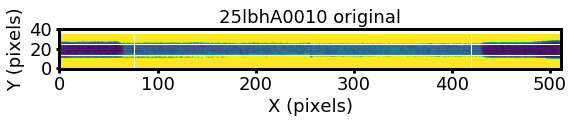

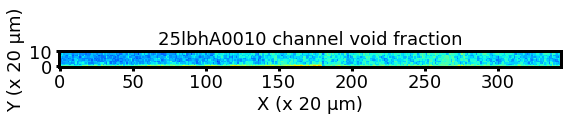

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 36.5%


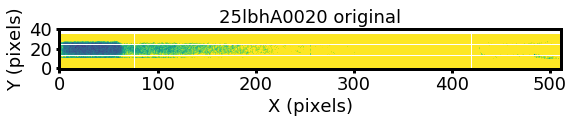

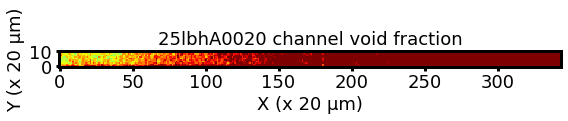

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 92.11%


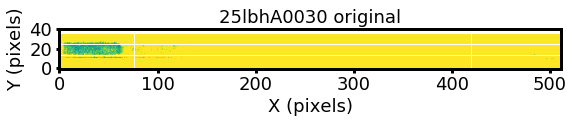

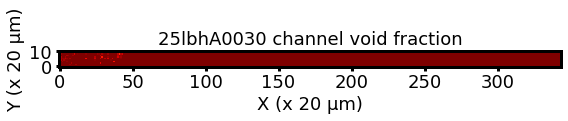

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 99.86%


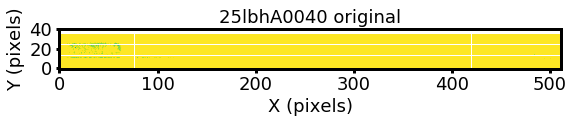

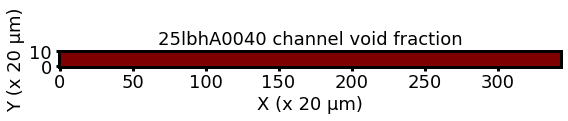

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 100.0%


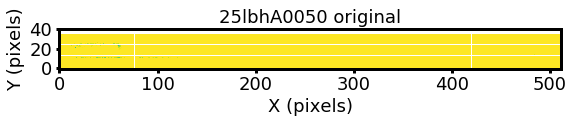

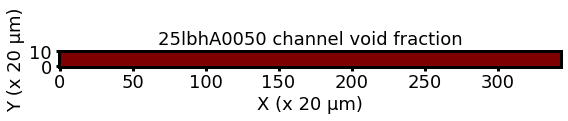

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 100.0%


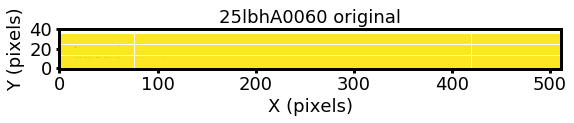

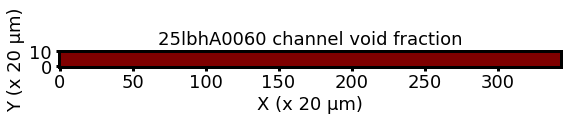

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 100.0%


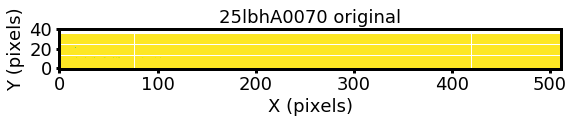

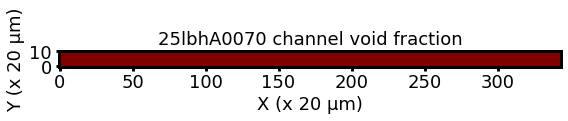

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 100.0%


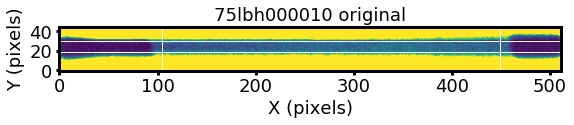

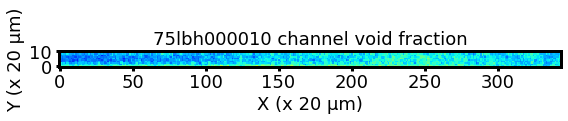

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 34.6%


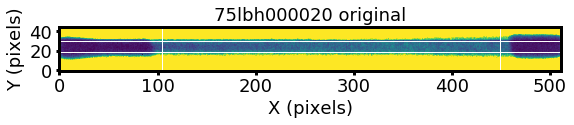

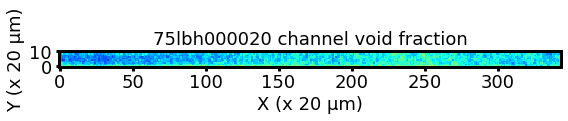

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 35.22%


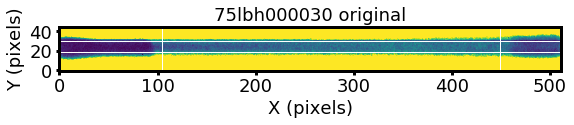

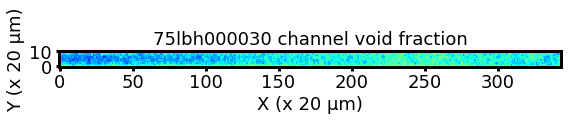

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 37.03%


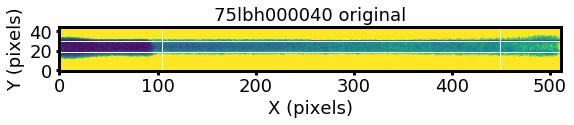

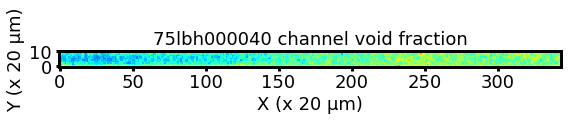

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 45.16%


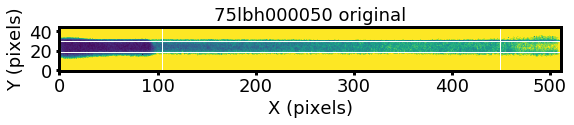

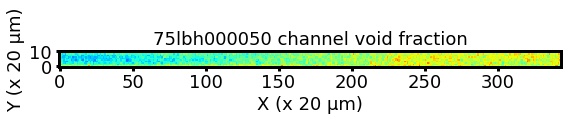

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 51.01%


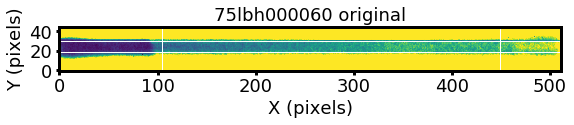

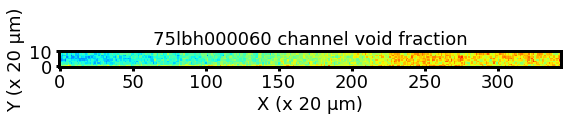

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 54.24%


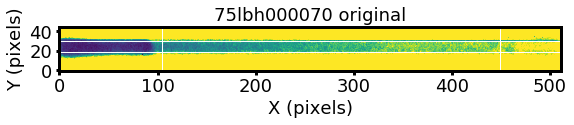

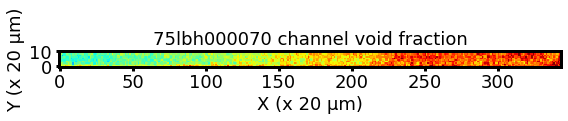

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 66.04%


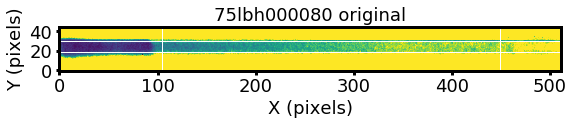

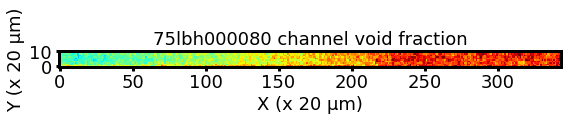

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 68.25%


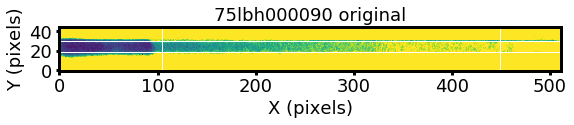

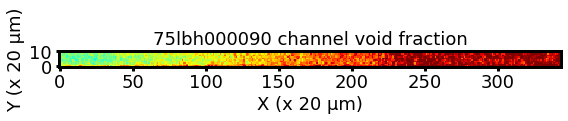

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 77.11%


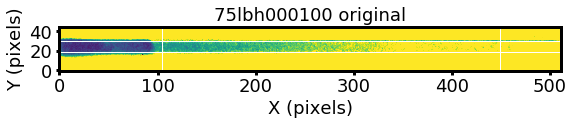

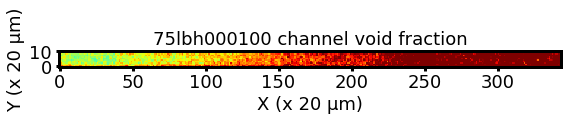

Image pixel shape: (344, 11)
Aspect ratio of channel image: 31.3
Average void fraction: 83.23%


Image data saved to C:\Users\Eric\Documents\GitHub\fluid_channel_modeling\data\compiled_data.npy


In [4]:
# loop over each image and trim image to channel dimensions
for img in all_images:
    
    # get flowrate and temperature from image names
    label = os.path.split(img)[1].split('.')[0]
    flowrate = int(label.split('lb')[0])

    # trim image based on the flow rate so that all images are centered
    if flowrate == 25:
        img_raw = plt.imread(img)[:, :, 0].T[245:280]
        temp = int(label.split('00')[-1])
        xlims, ylims = [76, 420], [14, 25]
    if flowrate == 75:
        img_raw = plt.imread(img)[:, :, 0].T[225:270]
        temp = int(label.split('000')[-1])
        xlims, ylims = [105, 449], [19, 30]
        
    # cut image to only include channel interior
    img_channel = img_raw[ylims[0]:ylims[1], xlims[0]:xlims[1]]
    
    # save channel results into dictionary
    model['channels'][label] = {
            'flowrate': flowrate,
            'temp': temp,
            'img_raw': img_raw,
            'img_channel': img_channel,
            'img_voidfrac': img_channel/255*model['d_um']} 

    # plot original channel image with channel bounding lines
    [plt.axvline(x=L, color='w', lw=1) for L in xlims]
    [plt.axhline(y=L, color='w', lw=1) for L in ylims]
    plt.imshow(img_raw, origin='lower', vmin=0, vmax=255)
    plot_setup(title=label+' original', labels=['X (pixels)', 'Y (pixels)'])
    plt.yticks([0, 20, 40])
    fig = plt.gcf()
    fig.set_size_inches(9, 9)
    plt.show()
    
    # plot cropped channel image
    plt.imshow(img_channel, origin='lower',
               vmin=0, vmax=model['d_um'], cmap='jet')
    plot_setup(title=label+' channel void fraction',
               labels=['X (x '+str(int(model['um_per_pixel']))+' μm)',
                       'Y (x '+str(int(model['um_per_pixel']))+' μm)'])
    fig = plt.gcf()
    fig.set_size_inches(9, 9)
    plt.show()
    
    print('Image pixel shape: {}'.format(img_channel.shape[::-1]))
    print('Aspect ratio of channel image: {}'.format(
        round(img_channel.shape[1]/img_channel.shape[0], 1)))
    print('Average void fraction: {}%'.format(
        round(100*np.mean(
            model['channels'][label]['img_voidfrac']/model['d_um']), 2)))
    print('======================================================================')

# save model parameters and cropped images to file
model_path = os.path.join(os.getcwd(), 'data', 'compiled_data.npy')
np.save(model_path, model)
print('\n\nImage data saved to {}'.format(model_path))